# Rossmann Sales Prediction
### Forecast sales using store, promotion, and competitor data
#### Before we start with our data exploration we have to understand the problem statement

* Rossmann operates over 3,000 drug stores in 7 European countries.
* Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance.
* Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality.
* With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
* We are provided with historical sales data for 1,115 Rossmann stores.
#### The task here is to forecast the "Sales" column.

### Data fields
* Id - an Id that represents a (Store, Date) duple within the test set
* Store - a unique Id for each store
* Sales - the turnover for any given day (this is what you are predicting)
* Customers - the number of customers on a given day
* Open - an indicator for whether the store was open: 0 = closed, 1 = open
* StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* StoreType - differentiates between 4 different store models: a, b, c, d
* Assortment - describes an assortment level: a = basic, b = extra, c = extended
* CompetitionDistance - distance in meters to the nearest competitor store
* CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* Promo - indicates whether a store is running a promo on that day
* Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# Data Importing

### Before starting lets see how our data looks like and try to understand the variables which are present

### Import basic libraries to perform operations in python
* Import basic operational libraries
* Import 2D visualization libraries
* Import 3D visualization libraries

In [ ]:
# Importing necessary basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Import the store file and save it as a store_details
* After importing display the store_details

In [ ]:
# This is the data which contains details of the store
store_details = pd.read_csv('/content/store.csv')

store_details

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


### Lets look at the training data set
* There are 2 files (train and test) you can either split the train data and execute the model or use the test data to evaluate the model

#### Import the train data and diplay its features
* Import it as train_data

In [ ]:
# This is the data which contains store details
train_data = pd.read_csv('/content/train.csv')
train_data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
set(store_details.columns).intersection(set(train_data.columns))

{'Store'}

### Now we have the store data and the train data we need to merge the data sets to create a combined data set

* We see that the store ID is common hence  we can merge the data set on it.
* Merge the store_details and train_data into combined_data

In [ ]:
# merged our train data and store details data based on store number to get complete info for each store

combined_data = pd.merge(store_details, train_data, on = 'Store')


# Write a code to display the head of the combined data.
combined_data.head()


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


In [ ]:
# Write a code to display the shape of the combined data.
combined_data.shape

(1017209, 18)

# Data Exploration

* First lets have a look if we have any missing values in the data set

In [ ]:
# Check weather there are any null values in the combined_data set

print("Total size of dataset: ", len(combined_data))

# Write a code to check the null values of the combined_data
combined_data.isnull().sum()


Total size of dataset:  1017209


Store                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
dtype: int64

In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  object 
 2   Assortment                 1017209 non-null  object 
 3   CompetitionDistance        1014567 non-null  float64
 4   CompetitionOpenSinceMonth  693861 non-null   float64
 5   CompetitionOpenSinceYear   693861 non-null   float64
 6   Promo2                     1017209 non-null  int64  
 7   Promo2SinceWeek            509178 non-null   float64
 8   Promo2SinceYear            509178 non-null   float64
 9   PromoInterval              509178 non-null   object 
 10  DayOfWeek                  1017209 non-null  int64  
 11  Date                       1017209 non-null  object 
 12  Sales                      1017209 non-null  int64  
 13  Customers   

#### Lets look at what are the unique values at the data set

In [ ]:
# Check weather there are any unique values in the data set
columns = list(combined_data.columns) # Storing the columns as a list
columns.remove('Date')                # Removing the date because the unique values in the date will be all the dates
columns.remove('CompetitionDistance') # Removing the CompettionDistance as all the values in the distance are unique.
for col in columns:                   # Printing the columns with respect to their unique values using for loop
    print(col,"-------->",combined_data[col].unique())

Store --------> [   1    2    3 ... 1113 1114 1115]
StoreType --------> ['c' 'a' 'd' 'b']
Assortment --------> ['a' 'c' 'b']
CompetitionOpenSinceMonth --------> [ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
CompetitionOpenSinceYear --------> [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Promo2 --------> [0 1]
Promo2SinceWeek --------> [nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Promo2SinceYear --------> [  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
PromoInterval --------> [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
DayOfWeek --------> [5 4 3 2 1 7 6]
Sales --------> [ 5263  5020  4782 ... 20362 18841 21237]
Customers --------> [ 555  546  523 ... 3727 4022 4106]
Open --------> [1 0]
Promo --------> [1 0]
StateHoliday --------> ['0' 'a' 'b' 'c' 0]
SchoolHoliday --------> [1 0]


### List some of the unique values present in the dataset that makes the model more understadable
*
*
*
*
*


#### From here we can extract the year and the month from the date column that we have to do some visualization

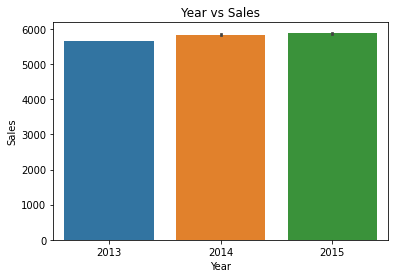

In [ ]:
# extracting year and month from Date (You can use any function to retrieve the year and the month)
combined_data['Year']  = combined_data['Date'].apply(lambda x: int(str(x)[:4])) # You can see the index of year is B/W 0-4
# Write a code to extract month from the date, Trick: You can copy the same line but just change the index value
combined_data['Month'] =combined_data['Date'].apply(lambda x: int(str(x)[5:7]))

# Plot a bar graph of Sales with respect to year
sns.barplot(x='Year', y='Sales', data=combined_data).set(title='Year vs Sales') # define the x and y variables to plot the graph

#print the plot
plt.show()

# Visualization
### Here we can try to understand the data more by different visualizations

#### Lets see Sales with respect to week

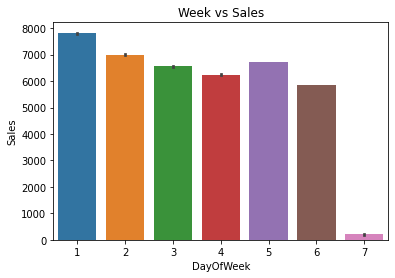

In [ ]:
# Sales with respect to week

#Write the code to plot the bargraph with respect to sales and week
sns.barplot(x='DayOfWeek', y='Sales', data=combined_data).set(title='Week vs Sales')
plt.show()

#### Lets see Sales with respect to Promo's

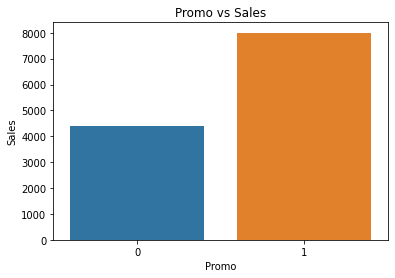

In [ ]:
# Sales with respect to Promo

#Write the code to plot the bargraph with respect to sales and promo
sns.barplot(x='Promo', y='Sales', data=combined_data).set(title='Promo vs Sales')
plt.show()

#### Lets see if a state holiday has an impact on our sales

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


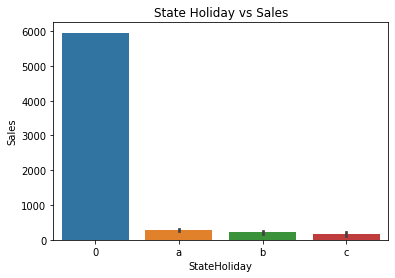

In [ ]:
# StateHoliday column has values 0 & "0", So, we need to change values with 0 to "0"
combined_data["StateHoliday"].loc[combined_data["StateHoliday"] == 0] = "0"

# Sales with respect to State Holiday
sns.barplot(x='StateHoliday', y='Sales', data=combined_data).set(title='State Holiday vs Sales')
plt.show()

#### Lets see if a school holidays has an impact on our sales

In [ ]:
# Sales with respect to School Holiday
combined_data["StateHoliday"].loc[combined_data["StateHoliday"] == 0] = "0"
#Here we are converting the numeric 0 into a str "0"
# .loc function locks replaces the value of 0 with "0"

# Sales with respect to State Holiday

#Write the code to plot the bargraph with respect to sales and state holiday

plt.show()


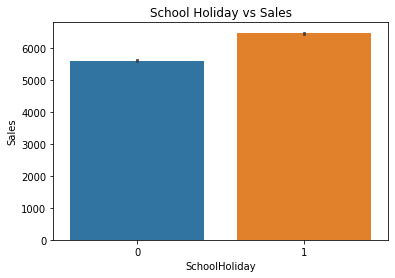

In [ ]:
# Try to plot sales with respect to School Holiday
sns.barplot(x='SchoolHoliday', y='Sales', data=combined_data).set(title='School Holiday vs Sales')
plt.show()

### Explain the reason to convert the numeric 0 into "0"

*
*

### Lets look at the data store wise

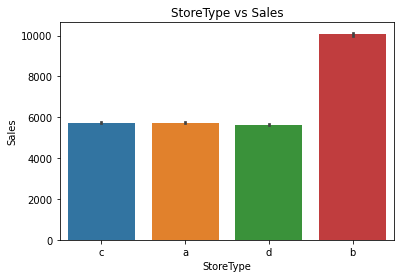

In [ ]:
# Sales with respect to StoreType

#Write the code to plot the bargraph with respect to sales and storetype
sns.barplot(x='StoreType', y='Sales', data=combined_data).set(title='StoreType vs Sales')
plt.show()

### Lets look at the data Assortment wise

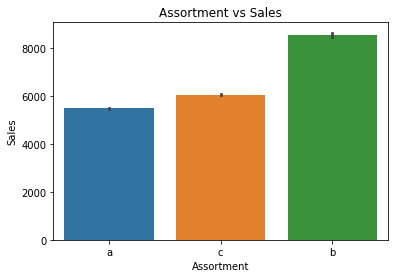

In [ ]:
# Sales with respect to Assortment

#Write the code to plot the bargraph with respect to sales and Assortment
sns.barplot(x='Assortment', y='Sales', data=combined_data).set(title='Assortment vs Sales')
plt.show()

## Please write what did we understand by our visualization?

*
*
*
*
*



### Filling the missing values

In [ ]:
# Write a code to Check if there are any missing values in the store_data
store_details.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
# Write a code to Check if there are any missing values in the train_data
train_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

### Fill the missing values in the store_data
#### There are different methods we can use to fill the missing values in the data, But we have to decide which method we can use.

In [ ]:
# Filling Promo2SinceWeek, Promo2SinceYear, PromoInterval with 0
## Write a code to fill the above columns with 0
store_details.update(store_details[['Promo2SinceWeek','Promo2SinceYear','PromoInterval']].fillna(0))

In [ ]:
# Filling CompetitionDistance with mean distance
## Write a code to fill the null values in competition distance column by taking the mean

mean_competition_distance = store_details['CompetitionDistance'].mean()
store_details['CompetitionDistance'].fillna(mean_competition_distance, inplace=True)

In [ ]:
# Filling CompetitionOpenSinceMonth, CompetitionOpenSinceYear with most occuring month and year respectively with mode
mode_competition_open_month = store_details['CompetitionOpenSinceMonth'].mode()[0]
print(mode_competition_open_month)

mode_competition_open_year = store_details['CompetitionOpenSinceYear'].mode()[0]
print(mode_competition_open_year)

store_details['CompetitionOpenSinceMonth'].fillna(mode_competition_open_month,inplace=True)
store_details['CompetitionOpenSinceYear'].fillna(mode_competition_open_year,inplace=True)

9.0
2013.0


In [ ]:
## Write a code to check if all the null values are filled

store_details.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### Merge the store_data and train_data after filling the missing values

In [ ]:
# Write a code to merge the store and the train on store again.

# Write a code to display the head of the combined data.
# merging the data again
combined_data = pd.merge(train_data, store_details, on='Store')
# We need to merge it because we have filled the null values in store data
combined_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [ ]:
# Write a code to check if there are any null values left.
combined_data.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

## Understanding sales VS Competition Distance

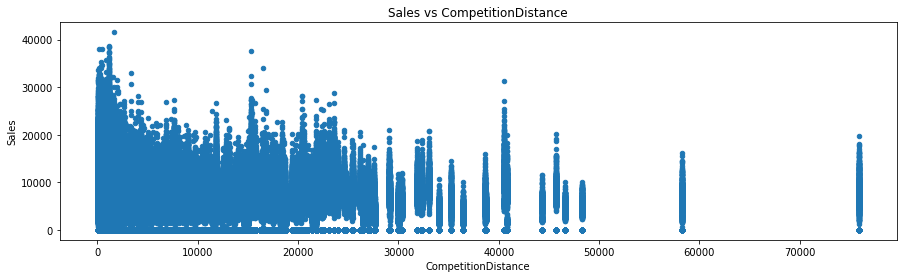

In [ ]:
combined_data.plot(kind='scatter',x='CompetitionDistance',y='Sales',figsize=(15,4),title="Sales vs CompetitionDistance")

### Please write the details which you have understood with the above graph

*
*
*
*

## Dealing with Outliers

* Here we can use sns.displot
* Set bins around 50 for clear visualization
* Plot it in the combined_data
* Place the x variable as "Sales"

In [ ]:
# Check if there is any outliers present in the data


#### There are different methods to remove the outliers
* Name them
* And state the reason for selecting the particular method

In [ ]:
# Name the different outliers removal method and give the reason for selecting your method

In [ ]:
# Write a code to remove the outliers

In [ ]:
# Write a code to plot the graph of the outliers removed

### Exceptional cases

##### Looking for a scenerio where the Stores are open and yet there is no sales on that day

In [ ]:
# Write a code to check when there is no sales even if the store is open
no_holiday_zero_sales =

print("Size of the data where sales were zero even when stores were open: ",len(no_holiday_zero_sales))
no_holiday_zero_sales.head()

* Remove these data point as they are an exceptional case

In [ ]:
# Write a code to drop the no_holida_zero_sales


combined_data.head()

### Converting categorical variables to numeric
* Name all the categorical values present in the data set
    *
    *
    *
    *
    *
    *
    *
    

In [ ]:
# extracting year and month from Date
combined_data['Year']  = combined_data['Date'].apply(lambda x: int(str(x)[:4]))
combined_data['Month'] = combined_data['Date'].apply(lambda x: int(str(x)[5:7]))
combined_data.drop(['Date'],axis=1,inplace=True)

In [ ]:
# Import the preprocessing library

# Write a code to save preprocessing.LabelEncoder() as label encoder

# Write a code to label encodeand fit transform "Storetype" and "Assortment"

### For the below converting of the data you can either use for loop and append the numerical variables
### Or else you can either use .loc method to save itf as numerical data

In [ ]:
# Write a code to convert stateholiday in numerical data,
# You can save state holiday "a" as 1
# Save state holiday "b" as 2
#Save state holiday "c" as 3

In [ ]:
# Write a code to convert Promointerval as numerical data type
# Save "Jan,Apr,Jul,Oct" as 1
# Save "Feb,May,Aug,Nov" as 2
# Save "Mar,Jun,Sept,Dec" as 3

In [ ]:
combined_data['StateHoliday'] = pd.to_numeric(combined_data['StateHoliday'])
combined_data['PromoInterval'] = pd.to_numeric(combined_data['PromoInterval'])

## Checking the correlation between the different variables using heatmap

In [ ]:
# Plot an heat map
# Let the figure size be (20,10)


What did we understand with the heat map?


# Implementing the models
* You'll have to find out the r2 score, Mean absolute error and root mean squared error
* After finding out the values plot a graph between actual and the predicted values

### List the different types of Machine Learning Model you can use in this data set.
*
*
*
*
*


In [ ]:
# Import the folowing libraries from sklearn.
# Import train test split
# Import r2 score
# Import mean squared error
# Import mean absolute error
# Import mean percentage error
# Import math

In [ ]:
combined_data_subset = combined_data[combined_data['Open'] == 1]
combined_data_subset_closed = combined_data[combined_data['Open'] == 0]

x_train, x_test, y_train, y_test_open = train_test_split(combined_data_subset.drop(['Sales','Customers', 'Open'],axis=1),
                                                    combined_data_subset['Sales'],test_size=0.20)

In [ ]:
epsilon = 1e-10

In [ ]:
# Write a code to Print the x_train columns

# Linear Regression

In [ ]:
# Import necessary libraries
# Implement the model.

In [ ]:
# Plot the graph between Actual and Predicted values

# SGD Regressor
Stochastic Gradient Descent (SGD) is a simple yet efficient optimization algorithm used to find the values of parameters/coefficients of functions that minimize a cost function.

In [ ]:
# Import necessary libraries
# Implement the model

In [ ]:
# Plot the graph between Actual and Predicted values

# Random Forest

In [ ]:
# Import necessary libraries
# Implement the model

In [ ]:
# Plot the graph between Actual and Predicted values

# Descision tree

In [ ]:
# Import necessary libraries
# Implement the model

In [ ]:
# Plot the graph between Actual and Predicted values

## Compare the r2 results and decide the best model

* The r2 score of the Model should be near 0.95